In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as sts




In [2]:
file = "clean_movie_df_aq.csv"

In [3]:
# Read in the file and define values based on the columns needed for this exercise 
movie_data = pd.read_csv(file)

budget = movie_data["budget"]
revenue = movie_data["adjusted_revenue"]
run_time = movie_data["runtime"]
voterating = movie_data["vote_average"]

In [4]:
# Found the average of the various variables to be compared
mean_runtime = round(np.mean(run_time),0)
print(f"The average runtime of the movies in this dataset is {mean_runtime} minutes")

mean_voterating = round(np.mean(voterating),0)
print(f"The average vote rating of the movies in this dataset is {mean_voterating}")

mean_budget= round(np.mean(budget),0)
print(f"The average budget of the movies in this dataset is {mean_budget}")


The average runtime of the movies in this dataset is 108.0 minutes
The average vote rating of the movies in this dataset is 6.0
The average budget of the movies in this dataset is 35332199.0


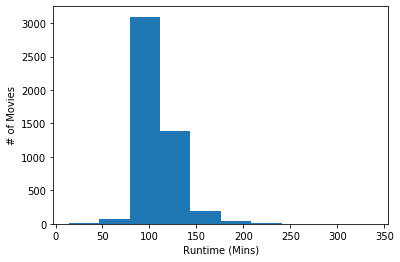

In [5]:
# Graphed out idea of what Runtime looks like 
plt.hist(run_time)
plt.xlabel("Runtime (Mins)")
plt.ylabel("# of Movies")
plt.show()



In [6]:
# Runtime bins by the hour - split into bins to understand what the correlation is between the hour and the half hour. 
runtime_bins = [0,29.9,89.9,149.9,209.9,269.9,539.9]
runtime_labels = ["<30 Mins", "30mins - <1.5hr","1.5hr - <2.5hrs","2.5hrs - <3.5hrs","3.5hrs - <4.5hrs","4.5hrs+"]

pd.cut(movie_data["runtime"], runtime_bins, labels=runtime_labels)
movie_data["Runtime Groups"] = pd.cut(movie_data["runtime"], runtime_bins, labels=runtime_labels)

number_of_movies = movie_data.loc[:,["Runtime Groups", "vote_count"]]
number_of_movies = number_of_movies.groupby("Runtime Groups")
number_of_movies = number_of_movies.count()

runtime_df = movie_data.groupby("Runtime Groups").mean()
runtime_df = runtime_df.loc[:,["vote_average", "adjusted_revenue"]]

votes_counted = movie_data.groupby("Runtime Groups").sum()

weighted_average_votes = movie_data.groupby("Runtime Groups").apply(lambda x: np.average(x["vote_average"], weights=x["vote_count"]))
weighted_average_revenue = movie_data.groupby("Runtime Groups").apply(lambda x: np.average(x["adjusted_revenue"], weights=x["vote_count"]))

runtime_df_clean_hr = pd.DataFrame({"Number of Movies": number_of_movies["vote_count"], "Number of Votes": votes_counted["vote_count"], "Average Voter Rating": runtime_df["vote_average"], "Weighted Average Voter Rating": weighted_average_votes, "Average Revenue": runtime_df["adjusted_revenue"], "Weighted Average Revenue": weighted_average_revenue})

runtime_df_clean_hr.style.format({"Number of Votes": "{:,.0f}", "Average Voter Rating": "{:.2f}", "Weighted Average Voter Rating": "{:.2f}", "Average Revenue": "${:,.0f}", "Weighted Average Revenue": "${:,.0f}" })


,Number of Movies,Number of Votes,Average Voter Rating,Weighted Average Voter Rating,Average Revenue,Weighted Average Revenue
Runtime Groups,,,,,,
<30 Mins,2,161,6.70,7.42,"$373,093,818","$628,031,839"
30mins - <1.5hr,668,"214,699",5.53,6.24,"$124,748,051","$302,571,008"
1.5hr - <2.5hrs,3951,"2,781,924",6.15,6.72,"$151,779,353","$369,944,110"
2.5hrs - <3.5hrs,167,"314,809",7.03,7.45,"$380,820,695","$860,144,927"
3.5hrs - <4.5hrs,10,"3,450",7.15,7.74,"$911,594,142","$2,273,787,487"
4.5hrs+,2,62,6.85,6.76,"$50,344,761","$20,103,245"


In [7]:
# Runtime Bins by the half hour - Broke the bins down further to understand what movies were popular by the half hour. 
runtime_bins = [0,29.9,59.9,89.9,119.9,149.9,179.9,209.9,239.9,539.9]
runtime_labels = ["<30 Mins", "30mins - <1hr","1hr - <1.5hrs","1.5hr - <2hrs","2hrs - <2.5hrs","2.5hrs - <3hrs","3hrs - <3.5hrs","3.5hrs - <4hrs","4hrs+"]

pd.cut(movie_data["runtime"], runtime_bins, labels=runtime_labels)
movie_data["Runtime Groups"] = pd.cut(movie_data["runtime"], runtime_bins, labels=runtime_labels)

number_of_movies = movie_data.loc[:,["Runtime Groups", "vote_count"]]
number_of_movies = number_of_movies.groupby("Runtime Groups")
number_of_movies = number_of_movies.count()

runtime_df = movie_data.groupby("Runtime Groups").mean()
runtime_df = runtime_df.loc[:,["vote_average", "adjusted_revenue"]]

votes_counted = movie_data.groupby("Runtime Groups").sum()

weighted_average_votes = movie_data.groupby("Runtime Groups").apply(lambda x: np.average(x["vote_average"], weights=x["vote_count"]))
weighted_average_revenue = movie_data.groupby("Runtime Groups").apply(lambda x: np.average(x["adjusted_revenue"], weights=x["vote_count"]))

runtime_df_clean_half = pd.DataFrame({"Number of Movies": number_of_movies["vote_count"], "Number of Votes": votes_counted["vote_count"], "Average Voter Rating": runtime_df["vote_average"], "Weighted Average Voter Rating": weighted_average_votes, "Average Revenue": runtime_df["adjusted_revenue"], "Weighted Average Revenue": weighted_average_revenue})

runtime_df_clean_half.style.format({"Number of Votes": "{:,.0f}", "Average Voter Rating": "{:.2f}", "Weighted Average Voter Rating": "{:.2f}", "Average Revenue": "${:,.0f}", "Weighted Average Revenue": "${:,.0f}" })



,Number of Movies,Number of Votes,Average Voter Rating,Weighted Average Voter Rating,Average Revenue,Weighted Average Revenue
Runtime Groups,,,,,,
<30 Mins,2,161,6.70,7.42,"$373,093,818","$628,031,839"
30mins - <1hr,6,72,7.08,6.89,"$57,839,174","$75,065,147"
1hr - <1.5hrs,662,"214,627",5.51,6.24,"$125,354,476","$302,647,328"
1.5hr - <2hrs,3057,"1,726,993",6.00,6.56,"$127,380,121","$276,289,230"
2hrs - <2.5hrs,894,"1,054,931",6.64,6.99,"$235,211,623","$523,263,447"
2.5hrs - <3hrs,132,"268,993",7.05,7.39,"$389,704,911","$833,483,281"
3hrs - <3.5hrs,35,"45,816",6.92,7.78,"$347,314,509","$1,016,679,677"
3.5hrs - <4hrs,6,"3,059",7.22,7.84,"$1,376,964,335","$2,529,100,474"
4hrs+,6,453,6.98,6.92,"$159,140,822","$241,269,053"


In [8]:
# Export to a clean file 
runtime_df_clean_half.to_csv('clean_runtime.csv',sep=',')

In [9]:
# Import clean file to graph with, find the most common runtimes based on number of movies and vote counts
newfile = "clean_runtime.csv"
runtime_file = pd.read_csv(newfile)

rtgrouping = runtime_file["Runtime Groups"]
movie_number = runtime_file["Number of Movies"]
vote_number = runtime_file["Number of Votes"]


In [10]:
new_df = runtime_file.loc[[2,3,4,5], ["Runtime Groups","Number of Movies", "Number of Votes", "Average Voter Rating",
       "Weighted Average Voter Rating", "Average Revenue",
       "Weighted Average Revenue"]]
new_df.style.format({"Number of Votes": "{:,.0f}", "Average Voter Rating": "{:.2f}", "Weighted Average Voter Rating": "{:.2f}", "Average Revenue": "${:,.0f}", "Weighted Average Revenue": "${:,.0f}" })

,Runtime Groups,Number of Movies,Number of Votes,Average Voter Rating,Weighted Average Voter Rating,Average Revenue,Weighted Average Revenue
2,1hr - <1.5hrs,662,"214,627",5.51,6.24,"$125,354,476","$302,647,328"
3,1.5hr - <2hrs,3057,"1,726,993",6.00,6.56,"$127,380,121","$276,289,230"
4,2hrs - <2.5hrs,894,"1,054,931",6.64,6.99,"$235,211,623","$523,263,447"
5,2.5hrs - <3hrs,132,"268,993",7.05,7.39,"$389,704,911","$833,483,281"


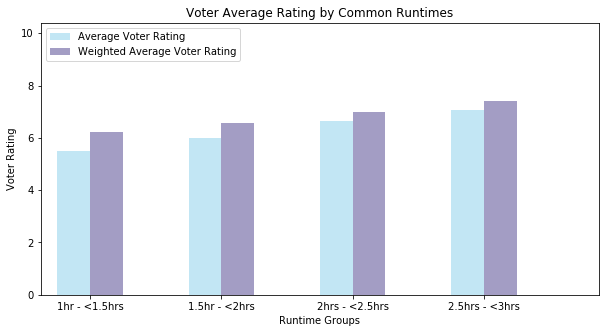

In [11]:
# Graph significant groups 
# graph_file = "sorted.csv"

# graphing = pd.read_csv(graph_file)

pos = list(range(len(new_df["Average Voter Rating"])))
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos,new_df["Average Voter Rating"],width,alpha=0.5,color="skyblue",label=new_df["Runtime Groups"][2])
plt.bar([p + width for p in pos],new_df["Weighted Average Voter Rating"],width,alpha=0.5,color="darkslateblue",label=new_df["Runtime Groups"][3])

ax.set_ylabel("Voter Rating")
ax.set_xlabel("Runtime Groups")

# Set the chart's title
ax.set_title("Voter Average Rating by Common Runtimes")

# Set the position of the x ticks
ax.set_xticks([p + .5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(new_df["Runtime Groups"])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(new_df["Weighted Average Voter Rating"]+3)])

# Adding the legend and showing the plot
plt.legend(["Average Voter Rating", "Weighted Average Voter Rating"], loc='upper left')
plt.show()

      

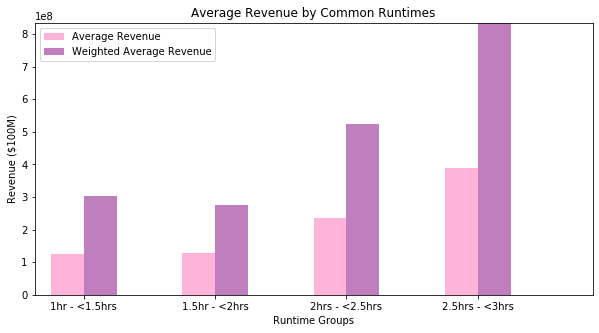

In [12]:
pos = list(range(len(new_df["Average Revenue"])))
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos,new_df["Average Revenue"],width,alpha=0.5,color="hotpink",label=new_df["Runtime Groups"][2])
plt.bar([p + width for p in pos],new_df["Weighted Average Revenue"],width,alpha=0.5,color="purple",label=new_df["Runtime Groups"][3])

ax.set_ylabel("Revenue ($100M)")
ax.set_xlabel("Runtime Groups")

# Set the chart's title
ax.set_title("Average Revenue by Common Runtimes")

# Set the position of the x ticks
ax.set_xticks([p + .5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(new_df["Runtime Groups"])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(new_df["Weighted Average Revenue"])])

# Adding the legend and showing the plot
plt.legend(["Average Revenue", "Weighted Average Revenue"], loc='upper left')
plt.show()
     